<a href="https://colab.research.google.com/github/khanhkhanhlele/ML-lab/blob/main/Session_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Kmeans

- Input:

$N$ điểm dữ liệu $x_1, x_2, ..., x_n$, $K < N $ là số cụm cần chia.

- Output:

$m_1,m_2,...,m_K$ là các tâm cụm, label của các $N$ điểm dữ liệu.


- algorithm:

B1: Chọn K điểm bất kì trong tập N điểm làm tâm các cụm ban đầu.

B2: Phân mỗi điểm dữ liệu vào cụm có tâm gần nó nhất.

B3: Kiểm tra điều kiện dừng.

B4: Cập nhật các tâm cụm bằng cách lấy trung bình cộng các điểm thuộc 1 cụm.

B5: Quay lại bước 2.

- Điều kiện dừng:

1.Số bước lặp qua 1 ngưỡng đặt trước.

2.Tâm thay đổi không đáng kể.

3.Độ tương đồng trung bình không tăng hoặc tăng không đáng kể.



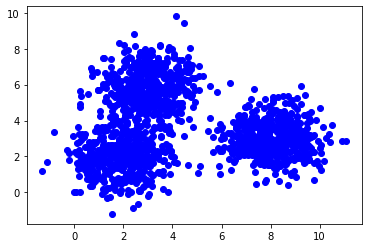

In [ ]:
#làm ví dụ đơn giản trên không gian 2D
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
#để tính khoẳng cách dữa 2 điểm
import random

#khởi tạo bộ dữ liệu
np.random.seed(18)
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
#Draw random samples from a multivariate normal distribution
X = np.concatenate((X0, X1, X2), axis = 0)
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

plt.plot(X[:,0], X[:,1], 'bo')
plt.show()

In [ ]:
#Ta sẽ phân cục X thành 3 phần X1, X2, X3
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0).fit(X)
m1, m2, m3 = model.cluster_centers_ #3 tâm của các cụm
pred_label = model.predict(X)
pred_label

array([1, 2, 2, ..., 1, 1, 1], dtype=int32)

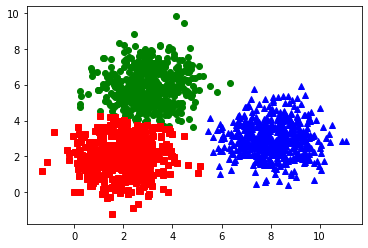

In [ ]:
#draw
def kmeans_display(X, label):
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^')
    plt.plot(X1[:, 0], X1[:, 1], 'go')
    plt.plot(X2[:, 0], X2[:, 1], 'rs')

    plt.plot()
    plt.show()
    
kmeans_display(X, pred_label)


Purity:

bằng $\frac{1}{N}$ nhân tổng các phần tử trên đường chéo chính của [Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(original_label, pred_label)

array([[  1,  14, 485],
       [498,   1,   1],
       [  0, 489,  11]])

do mỗi nhóm sẽ được đánh số 1,2,3 không theo thứ tự nên thay vì lấy tổng trên đường chéo chính ta tính tổng các phần tử lớn nhất ở mỗi hàng

In [ ]:
purity = (485+499+489)/1500
purity

0.982

NMI:

In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(original_label, pred_label)

0.9160478668584459

##SVMs

###SVM

ý tưởng:

 - là bài toán phân loại 2 lớp dữ liệu tách biệt tuyến tính (tức tồn tại siêu phẳng phân cách.
 - SVM là bài toán tìm siêu phẳng sao cho lề cực đại.

bài toán:

 - ta gán nhãn của $N$ điểm dữ liệu là $y_i$ là +1 hoặc -1, siêu phẳng cần tìm là $w^T x+b=0$
 - ứng với mỗi điểm dữ liệu $x_i$ ta có $w^T x+b \ge 1$ nếu $y_i =1$ và  $w^T x+b \le 11$ nếu $y_i =-1$
 - cần tìm min $\frac{2}{||w||}$ chính là cực đại lề

cách giải:
 - bài toán trên là mội bài toán quy hoạch lồi nên có tính chất nghiệm cực tiểu địa phương chính là nghiệm cực tiểu toàn cục.
 - người ta giải bằng cách xét bài toán đỗi ngẫu và dùng bài toán lagrange và điểm KKT



###soft-margin SVM

ý tưởng:

- vẫn xét đối với bài toán phân loại 2 lớp dữ liệu (có thể là tách biệt tuyến tính nhưng lại chứa các điểm nhiễu, hoặc là gần tách biệt tuyến tích, tức sẽ không có siêu phẳng nào phân chia hoàn toàn 2 lớp dữ liệu, tuy nhiên nếu chấp nhận một số điểm gần khu vực ranh giới bị lỗi thì vẫn có thể tìm được một siêu phẳng phân chia khá tốt 2 lớp dữ liệu)
- trong SVM lề mềm, người ta chấp nhận lỗi một vài điểm dữ liệu và cố gắng tôi thiểu lỗi này.

bài toàn:

- ứng với mỗi điểm $x_i$, ta thêm một đại lượng $\xi _i$ thỏa mãn:
\begin{array}{*{20}{c}}
{\left\langle {w.{x_i}} \right\rangle  + b \ge 1 - {\xi _i}\,\,\,\,\,\,\,\,\text{if}\,\,\,{y_i} = 1}\\
{\left\langle {w.{x_i}} \right\rangle  + b \le  - 1 + {\xi _i}\,\,\,\,\,\,\,\,\text{if}\,\,\,{y_i} =  - 1}
\end{array}
trong đó $\xi _i \ge 0$ với $\xi _i=0$ với các điểm được phân loại đúng
- Ta xây dựng hàm mục tiêu và hàm phạt $$\frac{1}{2}{||\mathbf{w}||_2^2} + C \sum_{n=1}^N \xi_n
$$
trong đó C là hằng số thể hiện mức đố hi sinh các điểm (ta sẽ tự chọn C)

cách giải:

- giải bài toán đỗi ngẫu tương tự SVM tuy nhiên có thêm một ràng buộc chặt trên các nhân tử laggrange
- cách 2: đưa về dạng không ràng buộc để đưa loss function về một hàm lồi và giải bằng gradient descent




###kernel SVM

ý tưởng:
- sử dụng cho các bài toàn tách biệt 2 tập dự liệu không tách biệt tuyến tính.
- biến đổi thành một không gian nhiều chiều hơn để các điểm dữ liệu có thể tách biệt bằng 1 siêu phẳng trên không gian mới từ đó quay về bài toán SVM lề cứng/mềm.
- Xét phép biến đổi $\Phi : X → F$ từ đó chuyển thành bài toán phân loại $ (Φ(x_i),y_i)$ với $i = 1,2,...,N$.

cách giải:
- do việc chọn ra hàm $\Phi$ là rất khó, mặt khác khi xét bài toán đỗi ngẫu ta thấy hàm $\Phi$ luôn xuất hiện ở dạng $\Phi(\mathbf{x}_m)^T\Phi(\mathbf{x}_n)$ nên ta đặt $k(\mathbf{x}, \mathbf{z}) = \Phi(\mathbf{x})^T\Phi(\mathbf{z})$ gọi là hàm hạt nhân

xét một số hàm hạt nhân thông dụng:
- tuyến tính: $k(\mathbf{x}, \mathbf{z}) = \mathbf{x}^T\mathbf{z}
$
- đa thức: $k(\mathbf{x}, \mathbf{z}) = (r + \gamma \mathbf{x}^T\mathbf{z})^d
$
- radial: $k(\mathbf{x}, \mathbf{z}) = \exp(-\gamma ||\mathbf{x} - \mathbf{z}||_2^2), ~~ \gamma > 0
$
- sigmoid: $k(\mathbf{x}, \mathbf{z}) = \text{tanh}(\gamma \mathbf{x}^T\mathbf{z} + r)
$
- tự định nghĩa:




###multi-class SVM
ý tưởng:
- xét với bài toán phân loại nhiều lớp khác nhau.
- có thể sử dụng [one-vs-rest hoặc one-vs-one](https://machinelearningcoban.com/2017/02/11/binaryclassifiers/#-binary-classifiers-cho-multi-class-classification-problems).(sử dụng nhiều lần cho các cách chia nhị phân)

Bài toán:


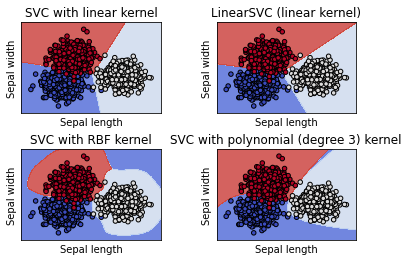

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = X#iris.data[:, :2]
y = original_label#iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()